# Exploring Hacker News Posts

**Hacker News** is a website, where anyone can submit stories (also known as "posts") and receive votes and comments from other users. It was first created by the startup incubator [Y Combinator](https://en.wikipedia.org/wiki/Y_Combinator) and is now extremely prominent in startup and technology circles. If a post on Hacker News gets in the top listing, it can receive hundreds of thousands of visitors as a result. 

Among the various stories, there are numerous ***Ask HN posts*** that are meant ask the Hacker News community a specific question:

~~~
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?
Ask HN: Aby recent changes to CSS that broke mobile?
~~~

Likewise, plenty of users can submit ***Show HN posts*** to present the Hacker News community a project, product, or just something interesting:

~~~
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made
Show HN: Shanhu.io, a programming playground powered by e8vm
~~~

In this project, we will act as a Data analysts working with a data set of the website's submissions. Our goal is to determine the following: 

- Which type of posts receives more comments on average: `Ask HN` or `Show HN`? 
- Do posts created at a certain time of day, receive more comments than others?

---

## *Resources and Documentation*

The data set we'll be using can be found [here](https://www.kaggle.com/hacker-news/hacker-news-posts), however it consists of only **20,000 rows** instead of the expected 300,000, as we removed all posts that received zero comments. 

Here is the brief description of the columns we should expect in the data set:

- `id`: the unique identifier from Hacker News for the post.
- `title`: the title of the post.
- `url`: the URL that the posts links to, if the post has a URL.
- `num_points`: the number of points the post acquired, (total number of upvotes minus the total number of downvotes).
- `num_comments`: the number of comments on the post.
- `author`: the username of the person who submitted the post.
- `created_at`: the date and time of the post's submission (according to Eastern Time Zone).

---

## *Reading Data*

Let's start off by reading the data set file:

In [1]:
from csv import reader

opened_file = open('hacker_news.csv')
read_file = reader(opened_file)
hn = list(read_file)

To properly analyze and edit our data as we progress further, we will need to remove the first row, describing ***column headers***. We will instead keep this row in a separate variable called `headers`.

In [2]:
headers = hn[:1]
hn = hn[1:]

headers

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]

And here is a quick glimpse of the first few entries:

In [3]:
for row in hn[0:3]:
    print(row, "\n")

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'] 

['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'] 

['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'] 



---

## *Analyzing Data*

### *Part 1: ASK or SHOW*

Since we only need to focus on the posts that have `Ask HN` or `Show HN` labels, we should loop through entire data set and isolate our desired rows from the rest of the data.

To determine if the post starts with `Ask HN` or `Show HN`, we will be using a built-in `startswith()` function. Since the function is case-sensitive, we will also call for a built-in `lower()` function. This will convert all posts to lowercase and let us use `startwith()` with just one input for each type:

In [4]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else :
        other_posts.append(row)

After isolating the data in separate lists, this is what we get:

In [5]:
print("Number of ASK Posts:", len(ask_posts))
print("Number of SHOW Posts:", len(show_posts))
print("Number of the rest of the Posts:", len(other_posts))

Number of ASK Posts: 1744
Number of SHOW Posts: 1162
Number of the rest of the Posts: 17194


Now we need to determine how many comments on average does each type of posts receive.

To do this we will loop through each of the newly created list and calculate each average separately (`no. of comments / length`). And since we know the length of both lists, this calculation should be easy.

In [6]:
total_ask_comments = 0
total_show_comments = 0

for row in ask_posts:
    comments = int(row[4])
    total_ask_comments += comments

for row in show_posts:
    comments = int(row[4])
    total_show_comments += comments

avg_ask_comments = total_ask_comments / len(ask_posts)
avg_show_comments = total_show_comments / len(show_posts)

print("Average of ASK Comments:", round(avg_ask_comments, 2))
print("Average of SHOW Comments:", round(avg_show_comments, 2))

Average of ASK Comments: 14.04
Average of SHOW Comments: 10.32


Our analysis showed that ***ASK HN posts*** receive **more comments** on average, so let's solely focus on them from this point forward.

### *Part 2: Most Popular Hour*

We should now be able to determine, if there is a certain timeframe that is likely to attract more users in the comments section.

For that, we will need to complete the following 3 steps:
1. Find the number of ***ASK posts*** created in each hour of the day,
2. Find the number of ***comments*** ASK posts received in each hour of the day,
3. Calculate the ***average*** of comments per posts.

In [7]:
result_list = []

for row in ask_posts:
    creation_date = row[6]
    comments = int(row[4])
    result_list.append([creation_date, comments])

result_list

[['8/16/2016 9:55', 6],
 ['11/22/2015 13:43', 29],
 ['5/2/2016 10:14', 1],
 ['8/2/2016 14:20', 3],
 ['10/15/2015 16:38', 17],
 ['9/26/2015 23:23', 1],
 ['4/22/2016 12:24', 4],
 ['11/16/2015 9:22', 1],
 ['2/24/2016 17:57', 1],
 ['6/4/2016 17:17', 2],
 ['9/19/2015 17:04', 7],
 ['9/22/2015 13:16', 1],
 ['6/21/2016 15:45', 1],
 ['1/13/2016 21:17', 4],
 ['10/4/2015 21:27', 4],
 ['1/25/2016 20:27', 2],
 ['10/27/2015 2:47', 3],
 ['1/19/2016 12:01', 1],
 ['3/22/2016 2:05', 22],
 ['9/8/2015 14:04', 2],
 ['8/28/2016 18:06', 2],
 ['7/20/2016 13:44', 7],
 ['9/12/2016 16:52', 7],
 ['2/29/2016 17:52', 3],
 ['4/18/2016 15:28', 6],
 ['12/28/2015 14:38', 2],
 ['4/4/2016 3:34', 1],
 ['1/15/2016 21:47', 3],
 ['11/19/2015 5:33', 29],
 ['12/20/2015 3:59', 2],
 ['10/15/2015 21:34', 20],
 ['2/26/2016 19:20', 3],
 ['8/2/2016 18:00', 3],
 ['2/28/2016 1:24', 33],
 ['1/13/2016 9:12', 5],
 ['5/6/2016 1:14', 4],
 ['6/23/2016 13:59', 7],
 ['4/30/2016 17:21', 11],
 ['10/20/2015 19:21', 1],
 ['10/25/2015 15:09', 9],


But, as we know, the date is shown in a full format, including the day, month, and year. So, how do we derive hours from this string? 

Luckily, the Python module called `daytime` can help us with that. We will represent each entry's date in a `datetime` format and then only extract the ***hour*** portion of the dates.

The extracted ***hour*** portion will be used as a ***key*** to two dictionaries, that will store the amount of posts (`counts_by_hour`) and comments (`comments_by_hour`).

In [8]:
import datetime as dt

counts_by_hour = {}       # Create two Dictionaries
comments_by_hour = {}

for row in result_list:
    date_raw = row[0]
    comments = row[1]
    
    date_formatted = dt.datetime.strptime(date_raw, "%m/%d/%Y %H:%M")   #Dissect the date into portions
    
    hour = date_formatted.strftime("%H")    # "Hour" portion

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comments

In [9]:
print('"counts_by_hour" Dictionary (Reformatted)\n')

for row in counts_by_hour:
    print(row + ":00 :", counts_by_hour[row], "posts")

"counts_by_hour" Dictionary (Reformatted)

09:00 : 45 posts
13:00 : 85 posts
10:00 : 59 posts
14:00 : 107 posts
16:00 : 108 posts
23:00 : 68 posts
12:00 : 73 posts
17:00 : 100 posts
15:00 : 116 posts
21:00 : 109 posts
20:00 : 80 posts
02:00 : 58 posts
18:00 : 109 posts
03:00 : 54 posts
05:00 : 46 posts
19:00 : 110 posts
01:00 : 60 posts
22:00 : 71 posts
08:00 : 48 posts
04:00 : 47 posts
00:00 : 55 posts
06:00 : 44 posts
07:00 : 34 posts
11:00 : 58 posts


In [10]:
print('"comments_by_hour" Dictionary (Reformatted)\n')

for row in comments_by_hour:
    print(row + ":00 :", comments_by_hour[row], "comments")

"comments_by_hour" Dictionary (Reformatted)

09:00 : 251 comments
13:00 : 1253 comments
10:00 : 793 comments
14:00 : 1416 comments
16:00 : 1814 comments
23:00 : 543 comments
12:00 : 687 comments
17:00 : 1146 comments
15:00 : 4477 comments
21:00 : 1745 comments
20:00 : 1722 comments
02:00 : 1381 comments
18:00 : 1439 comments
03:00 : 421 comments
05:00 : 464 comments
19:00 : 1188 comments
01:00 : 683 comments
22:00 : 479 comments
08:00 : 492 comments
04:00 : 337 comments
00:00 : 447 comments
06:00 : 397 comments
07:00 : 267 comments
11:00 : 641 comments


Since both dictionaries have the same length, we should be able to iterate them both simultaneously and calculate the average of comments for each hour. The resulting list of values will be stored in a variable named `avg_by_hour`.

In [11]:
avg_by_hour = []

for hour in counts_by_hour:
    comments = comments_by_hour[hour]
    posts = counts_by_hour[hour]
    
    #Calculate averages and store them as values in a Dictionary
    avg_by_hour.append([hour, comments / posts])

avg_by_hour

[['09', 5.5777777777777775],
 ['13', 14.741176470588234],
 ['10', 13.440677966101696],
 ['14', 13.233644859813085],
 ['16', 16.796296296296298],
 ['23', 7.985294117647059],
 ['12', 9.41095890410959],
 ['17', 11.46],
 ['15', 38.5948275862069],
 ['21', 16.009174311926607],
 ['20', 21.525],
 ['02', 23.810344827586206],
 ['18', 13.20183486238532],
 ['03', 7.796296296296297],
 ['05', 10.08695652173913],
 ['19', 10.8],
 ['01', 11.383333333333333],
 ['22', 6.746478873239437],
 ['08', 10.25],
 ['04', 7.170212765957447],
 ['00', 8.127272727272727],
 ['06', 9.022727272727273],
 ['07', 7.852941176470588],
 ['11', 11.051724137931034]]

Great! We are almost done.

To find the hours that receive the most comments we need to sort the data in a descending order. However, it's difficult to do that with a dictionary that stores numbers, as *values* instead of *keys*.

So for the purpose of our analysis, we'll need to create a new dictionary (`swap_avg_by_hour`), where we swap *key* and *value* numbers.

In [12]:
swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

swap_avg_by_hour

[[5.5777777777777775, '09'],
 [14.741176470588234, '13'],
 [13.440677966101696, '10'],
 [13.233644859813085, '14'],
 [16.796296296296298, '16'],
 [7.985294117647059, '23'],
 [9.41095890410959, '12'],
 [11.46, '17'],
 [38.5948275862069, '15'],
 [16.009174311926607, '21'],
 [21.525, '20'],
 [23.810344827586206, '02'],
 [13.20183486238532, '18'],
 [7.796296296296297, '03'],
 [10.08695652173913, '05'],
 [10.8, '19'],
 [11.383333333333333, '01'],
 [6.746478873239437, '22'],
 [10.25, '08'],
 [7.170212765957447, '04'],
 [8.127272727272727, '00'],
 [9.022727272727273, '06'],
 [7.852941176470588, '07'],
 [11.051724137931034, '11']]

Now that it's done, we can sort the the data in a descending order an isolate only the top five values.

In [13]:
sorted_swap = sorted(swap_avg_by_hour, reverse=True)

In [14]:
print("Top 5 Hours for Ask Posts Comments:\n")

for row in sorted_swap[:5]:   #Only the Top 5 values
    avg_posts = row[0]
    hour = row[1]
            
    template = "{hour}:00: {posts:.2f} average comments per post."
    output = template.format(hour=hour,
                            posts=avg_posts)
    
    print(output)

Top 5 Hours for Ask Posts Comments:

15:00: 38.59 average comments per post.
02:00: 23.81 average comments per post.
20:00: 21.52 average comments per post.
16:00: 16.80 average comments per post.
21:00: 16.01 average comments per post.


Perfect, our analysis is complete!

## *Conclusion*

Now we see from our results, that posts created at ***3:00PM ET*** gather more comments on average than the rest of the posts. 

Interestingly, the second result from the top is ***2:00AM ET***. How come the night posts can also gain massive popularity?

One potential reason for that might be the difference in time zones. There is a difference of 11 to 12 hours between China and US. So, it's possible that the users from a densely populated countries are more active in the afternoon of their zone, just like the American users are more active during the day of their timezone. 

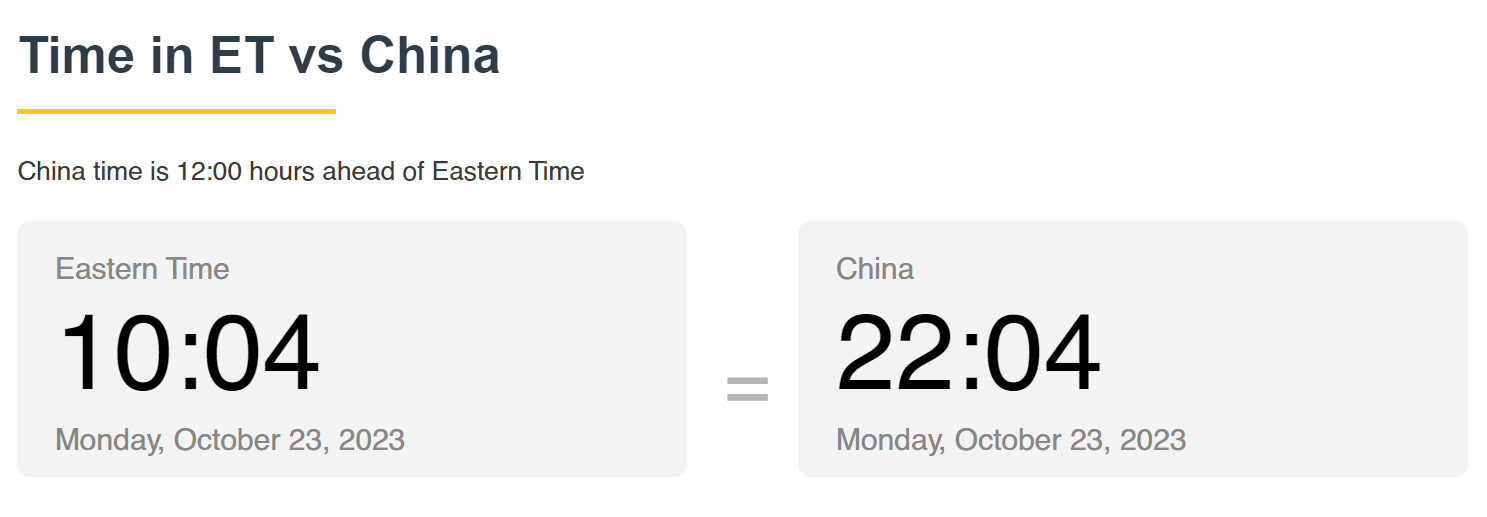

To confirm this hypothesis, we would need to find and analyze a data set that shows the number of comments per country of origin. But that is a discussion for another time...